In [41]:
## Python essential libraries
import os
from pathlib import Path
import numpy as np
import h5py
from histpy import Histogram
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cycler
import healpy as hp

# Matplotlib style template
## For black, set #000000. For navy, set #002060
defaultcolor = '#002060'
plt.rcParams.update({'text.color': defaultcolor, 'axes.labelcolor': defaultcolor, 
                     'xtick.color': defaultcolor, 'ytick.color': defaultcolor,
                     'axes.prop_cycle': cycler(color=['b', 'r', 'limegreen']),
                     'font.family':'serif', 'font.serif': 'Times New Roman',
                     'font.size': 22, 'lines.linewidth': 3,
                     'figure.figsize': (9.6, 5.4), 'figure.dpi': 100})

In [2]:
# BASE_DIR = os.path.dirname(os.path.abspath(__file__))
# DATA_DIR = os.path.join(BASE_DIR, 'data')
DATA_DIR = Path(os.path.dirname('/Users/penguin/Documents/Grad School/Research/COSI/COSIpy/docs/tutorials/data/'))

In [3]:
FILE_DIR = Path('/Users/penguin/Documents/Grad School/Research/COSI/COSIpy/docs/tutorials/44Ti')

In [4]:
axisNuLambda = 3072
axisEi = 1
axisEm = 1
axisPhi = 60
axisPsiChi = 3072

In [5]:
labels = np.array(['NuLambda', 'Ei', 'Em', 'Phi', 'PsiChi'], dtype='<U8')
labels = np.array(['0', '1', '2', '3', '4'])
shape = np.array([axisNuLambda, axisEi, axisEm, axisPhi, axisPsiChi])

In [6]:
# Define the number of rows (data space) and columns (model space)
# First tensor dot product is R.M, need to sum over model space
NUMROWS = np.prod(shape[2:])
NUMCOLS = np.prod(shape[:2])

NUMROWS, NUMCOLS

(184320, 3072)

### Model Map Format

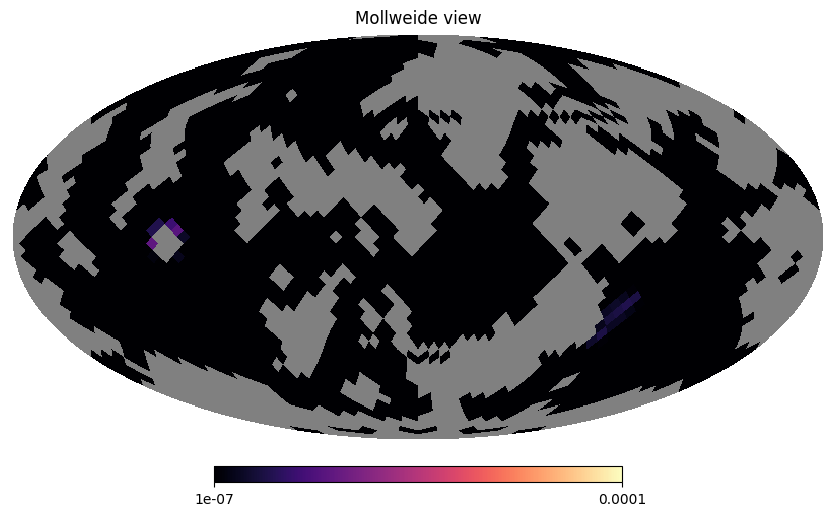

In [21]:
modelmap = h5py.File(FILE_DIR / 'results/model_map_itr50.hdf5', 'r')
data = modelmap['hist']['contents'][:,1]
data[data <= 0] = 1e-12
hp.mollview(np.genfromtxt('outputs/44Ti_3sources_200iter.csv') - data[1:-1], min = 1e-7, max=1e-4, norm ='log', cmap = 'magma')
plt.show()

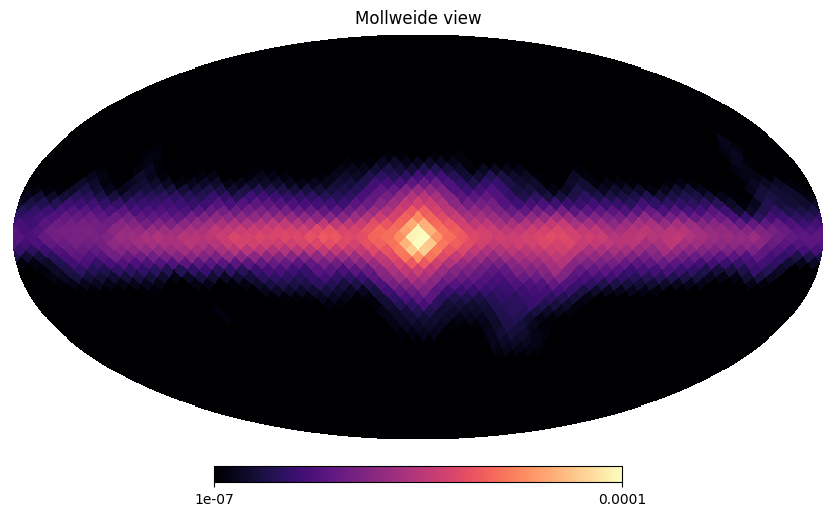

In [11]:
hp.mollview(np.genfromtxt('outputs/511_thindisk_200iter.csv'), min = 1e-7, max=1e-4, norm ='log', cmap = 'magma')
plt.show()

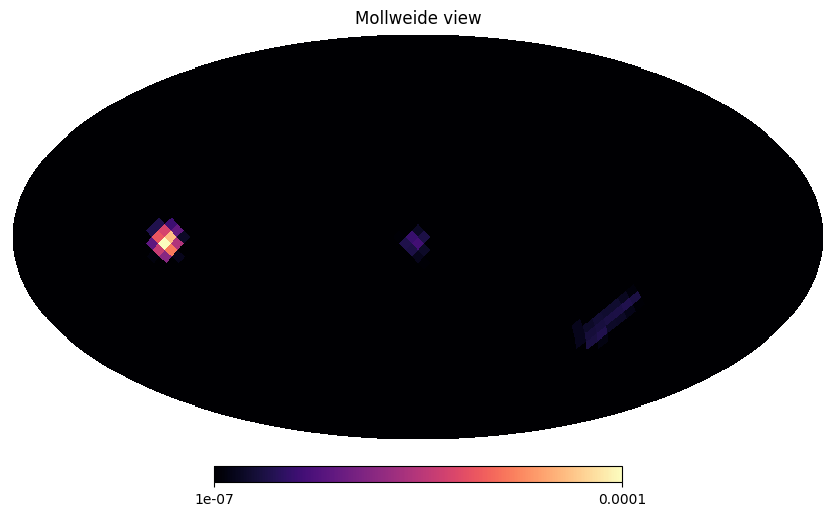

In [6]:
hp.mollview(np.genfromtxt('outputs/Mstep200.csv'), min = 1e-7, max=1e-4, norm ='log', cmap = 'magma')
plt.show()

### Plotting speed up

In [ ]:
# All timing information obtained from Expanse run
# _S --> Intermediate files are saved
# _LL --> Both data vectors and response matrix is placed in the lustre filesystem
# _ --> Only response matrix is placed in the lustre filesystem. Data vectors are in the same directory as the python script.

In [38]:
df_expanse = pd.read_csv('outputs/speedup_expanse.txt', delimiter=', ', engine='python')
df_mac = pd.read_csv('outputs/speedup_mac.txt', delimiter=', ', engine='python')
df_expanse

,Data,Stripelength,Nodes,Iterations,Time
0,44TiS,1,2,200,-1.0
1,44TiS,1,8,200,163.0
2,44TiS,1,16,200,234.0
3,44TiS,16,1,200,-1.0
4,44TiS,16,2,200,-1.0
5,44TiS,16,3,200,40.0
6,44TiS,16,4,50,18.0
7,44Ti,16,4,50,8.2
8,44Ti,16,6,50,7.6
9,44Ti,16,8,50,7.6


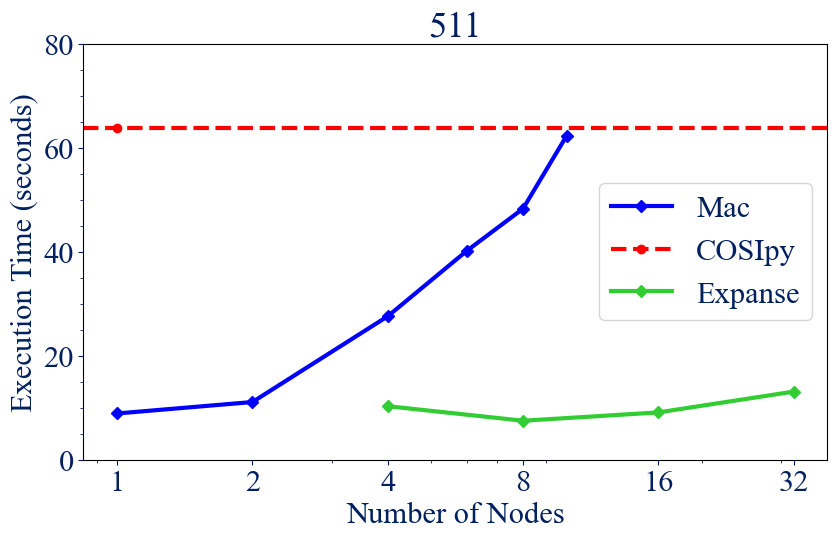

In [73]:
signal = '511'

df = df_mac
# COSIpy code: 44Ti took 78.3 and 511 took 63.8 on a Mac
if signal == '44Ti':
    onedata = 78.3
elif signal == '511':
    onedata = 63.8

data = df[(df['Data'] == signal) & (df['Time'] != -1)]
xdata = data['Nodes']
ydata = data['Time']

plt.plot(xdata, ydata, marker='D', label='Mac')
plt.axhline(onedata, ls='--', c='r')
plt.plot(1, onedata, marker='o', ls='--', c='r', label='COSIpy')

df = df_expanse
data = df[(df['Data'] == signal) & (df['Time'] != -1)]
xdata = data['Nodes']
ydata = data['Time']
plt.plot(xdata, ydata, marker='D', c='limegreen', label='Expanse')

plt.xscale('log')
plt.xticks([1,2,4,8,16,32])
plt.gca().set_xticklabels([1,2,4,8,16,32])
plt.xlabel('Number of Nodes')
plt.ylabel('Execution Time (seconds)')
plt.ylim([0,80])
plt.minorticks_on()
plt.title(signal)
plt.legend(loc='center right')
plt.show()